In [3]:
import torch
if torch.cuda.is_available():
  device = "cuda"
elif torch.backends.mps.is_available():
  device = torch.device("mps")
else:
  device="cpu"
  print(f"Using device={device}")


In [4]:
import torch
m= 0.7
c= 0.3

X= torch.arange(0,1,0.02).unsqueeze(dim=1)
y= m * X + c

print(f"Shape of X {X.shape}")
print(f"Shape of Y {y.shape}")
print(f"Type of X {X.dtype}")
print(f"Type of Y {y.dtype}")


Shape of X torch.Size([50, 1])
Shape of Y torch.Size([50, 1])
Type of X torch.float32
Type of Y torch.float32


In [5]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)
def plot_data(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, predictions=None):
  plt.figure(figsize=(8,6))
  plt.scatter(X_train,y_train,s=8,c='b',label='Training Data')
  plt.scatter(X_test,y_test,s=8,c='r',label='Testing Data')
  if predictions is not None:
    plt.scatter(X_test,predictions,s=8,c='g',label='Predictions Data')
    plt.legend()
    plt.title("X vs y")
    plt.show()


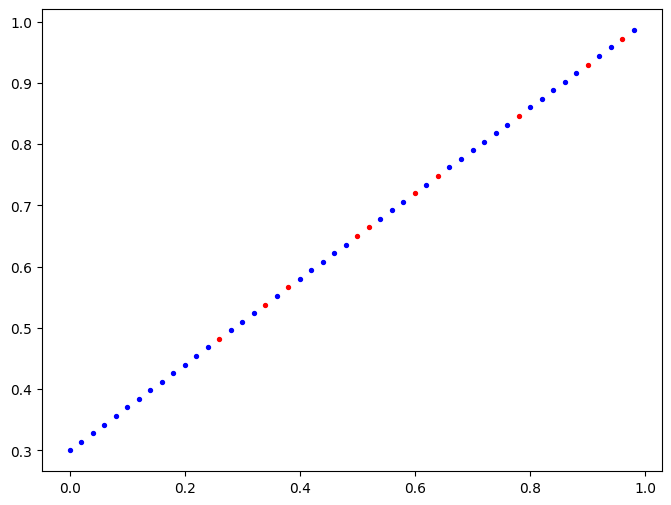

In [6]:
plot_data()

In [7]:
from torch import nn
class FirstNeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad=True))
    self.bias = nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad=True))

  def forward(self,x:torch.Tensor) -> torch.Tensor:
   return self.weights*x +self.bias

In [8]:
torch.manual_seed(42)
model = FirstNeuralNetwork()
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

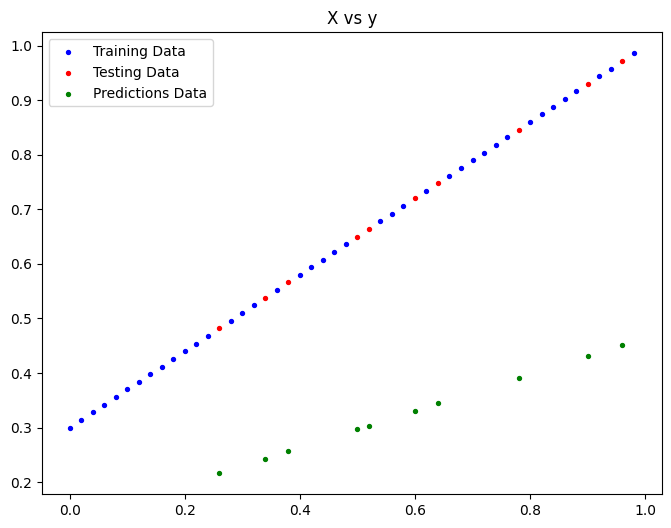

In [9]:
with torch.inference_mode():
  y_preds = model(X_test).cpu().detach().numpy()

plot_data(predictions=y_preds)

In [10]:
# setup loss function
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [11]:
epochs =200
# cast the model to device
model.to(device)
# cast the data to device
X_train,y_train = X_train.to(device), y_train.to(device)
X_test,y_test = X_test.to(device), y_test.to(device)
train_loss_list = []
test_loss_list = []
for epoch in range(epochs):
  #Training
  #1.forward Pass
  train_preds = model(X_train)
  #2. Compute Training Loss
  train_loss = loss_fn(y_train,train_preds)
  #3 Zero grad the optimizer
  optimizer.zero_grad()
  #4. Loss Backwards
  train_loss.backward()
  #5. Step the optimizer
  optimizer.step()
  train_loss_list.append(train_loss.cpu().detach().numpy())

  ## Testing
  model.eval()
  # Compute the Test predictions
  with torch.inference_mode():
    test_preds = model(X_test)
    #compute the Test loss
    test_loss = loss_fn(y_test,test_preds)
    test_loss_list.append(test_loss.cpu().detach().numpy())
    if (epoch+1)%10 ==0:
      print(f"Epoch {epoch+1}|Train loss {train_loss:.4f}|Test Loss{test_loss:.4f}")





Epoch 10|Train loss 0.0042|Test Loss0.0035
Epoch 20|Train loss 0.0026|Test Loss0.0016
Epoch 30|Train loss 0.0019|Test Loss0.0012
Epoch 40|Train loss 0.0014|Test Loss0.0009
Epoch 50|Train loss 0.0011|Test Loss0.0007
Epoch 60|Train loss 0.0008|Test Loss0.0005
Epoch 70|Train loss 0.0006|Test Loss0.0004
Epoch 80|Train loss 0.0004|Test Loss0.0003
Epoch 90|Train loss 0.0003|Test Loss0.0002
Epoch 100|Train loss 0.0003|Test Loss0.0002
Epoch 110|Train loss 0.0002|Test Loss0.0001
Epoch 120|Train loss 0.0001|Test Loss0.0001
Epoch 130|Train loss 0.0001|Test Loss0.0001
Epoch 140|Train loss 0.0001|Test Loss0.0000
Epoch 150|Train loss 0.0001|Test Loss0.0000
Epoch 160|Train loss 0.0000|Test Loss0.0000
Epoch 170|Train loss 0.0000|Test Loss0.0000
Epoch 180|Train loss 0.0000|Test Loss0.0000
Epoch 190|Train loss 0.0000|Test Loss0.0000
Epoch 200|Train loss 0.0000|Test Loss0.0000


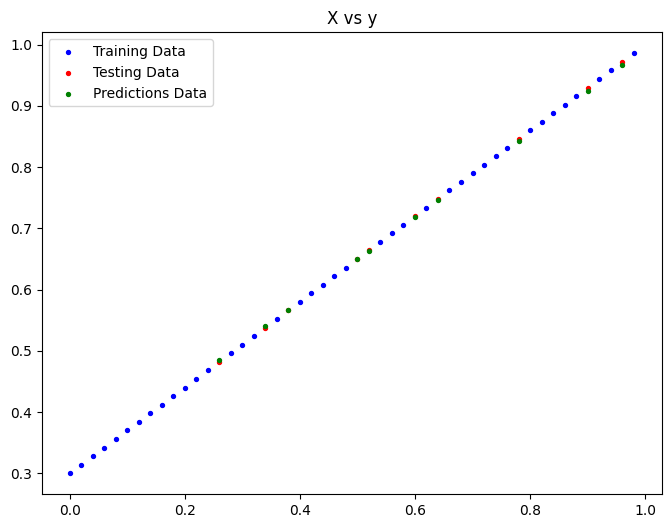

In [12]:
with torch.inference_mode():
  y_preds = model(X_test).cpu().detach().numpy()

plot_data(predictions= y_preds)

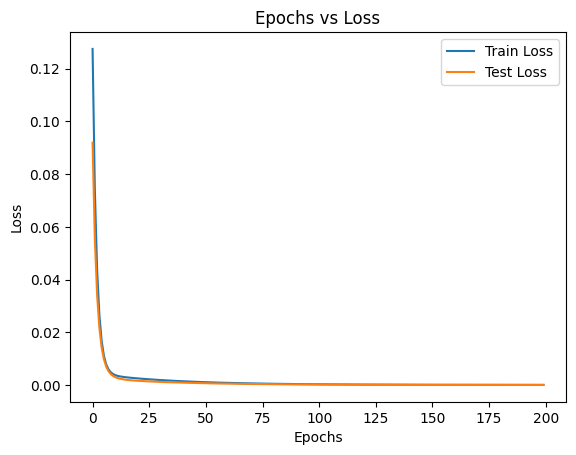

In [13]:
# plot loss curve
plt.plot(range(epochs),train_loss_list,label="Train Loss")
plt.plot(range(epochs), test_loss_list, label="Test Loss")
plt.legend()
plt.title("Epochs vs Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig("loss.png")
plt.show()

In [14]:
torch.save(obj=model.state_dict(), f="model.pth")
print("Success")

Success
